In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold #Something to split and randomise the data 

from sklearn import tree

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('Credit/creditdefault_train.csv') #Putting the test data and the train data in data frames 
test = pd.read_csv('Credit/creditdefault_test.csv')

#Seperating the train data labels from the inputs:
y_train = data['Y']
x_train = data.drop(['Y'],axis=1)

#Seperating the test data labels from the inputs:
y_test = test['Y']
x_test = test.drop(['Y'],axis=1)

kf = StratifiedKFold(n_splits=3)
#kf = KFold(15000, n_folds=3)



In [3]:
def visualise(train_acc,train_d,train_p,test_acc,test_d,test_p,dependant_var,dependant_label):
    """Visualisation of train/test accuracy and precision"""
    fig,axs = plt.subplots(3,1,figsize=(12,6))
    
    axs[0].plot(dependant_var,train_acc,'ro-',dependant_var,test_acc,'bv--')
    axs[0].legend(['Training Accuracy','Test Accuracy'])
    axs[0].set_xlabel(dependant_label)
    axs[0].set_ylabel('Accuracy')
    
    axs[1].plot(dependant_var,train_d,'ro-',dependant_var,test_d,'bv--')
    axs[1].legend(['Training default precision','Test default precision'])
    axs[1].set_xlabel(dependant_label)
    axs[1].set_ylabel('Default precision')
    
    axs[2].plot(dependant_var,train_p,'ro-',dependant_var,test_p,'bv--')
    axs[2].legend(['Training payment precision','Test payment precision'])
    axs[2].set_xlabel(dependant_label)
    axs[2].set_ylabel('payment precision')
    

In [18]:
    
def decision(depth,impurity='gini',q=2):   
    train_metrics_mean = np.zeros(3) #Place to store the mean of accuracy, defualt and payment precision 
    

    train_metrics = np.zeros((3,3)) #3x3 matrix to store current train accuracy 
    
    test_metrics = np.zeros(3)  #Place to store test accuracy of that model

    counter = 0
    for train_index, test_index in kf.split(x_train,y_train):# Splitting into three folds 

        #Taking the elements and putting them into array:
        temp_train_x = np.take(x_train,train_index,0)
        temp_train_y = np.take(y_train,train_index,0)

        temp_test_x = np.take(x_train,test_index,0)
        temp_test_y = np.take(y_train,test_index,0)

        #Building model
        dt = tree.DecisionTreeClassifier(criterion=impurity,max_depth=depth)
        
        #Fitting model
        dt.fit(temp_train_x,temp_train_y)
        #Creating predictions
        pred = dt.predict(temp_train_x)
        
        #Storing the metrics of current fold
        train_metrics[counter][0] = accuracy_score(pred,temp_train_y)
        train_metrics[counter][1] = precision_score(pred,temp_train_y)
        train_metrics[counter][2] = precision_score(pred,temp_train_y,pos_label=0)
        
        counter+=1
    
    #Working out the mean of the outputs
    train_metrics_mean = np.mean(train_metrics,axis=0)  ## Working out the mean
    
    #Tesing on the full data set and test set
    
    main_dt = tree.DecisionTreeClassifier(criterion=impurity,max_depth=depth)
        
    main_dt.fit(x_train,y_train)
    
    prediction = main_dt.predict(x_test)
    #Storing the metrics on test set
    test_metrics[0] = accuracy_score(prediction,y_test)
    test_metrics[1] = precision_score(prediction,y_test)
    test_metrics[2] = precision_score(prediction,y_test,pos_label=0)
    
    return (train_metrics_mean,test_metrics) #Returning two arrays filled with elements
    
    

Whats consuming the most time is the fitting of the data.

## Gini

In [14]:
def treeBuilder(impurity='gini'):
    #Places to store the metrics to judge by:
    train_acc = []  #Train accuracy score 
    train_d = []    #Train Default precision
    train_p = []    #Train payment precision


    test_acc = []    #Test accuracy score 
    test_d = []      #Test default precision
    test_p = []      #Test Payment precison

    for i in range(2,31): #Going through 1-30 neigbours
        train,test = decision(i,impurity) #Building the model with different hyperparameters

        #Storing the elements in the different arrays:
        #Train elements
        train_acc.append(train[0])
        train_d.append(train[1])
        train_p.append(train[2])

        #Test elements
        test_acc.append(test[0])
        test_d.append(test[1])
        test_p.append(test[2])

    visualise(train_acc,train_d,train_p,
              test_acc,test_d,test_p,range(2,31),'depth')

C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureW

C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureW

C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureW

C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\sword\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureW

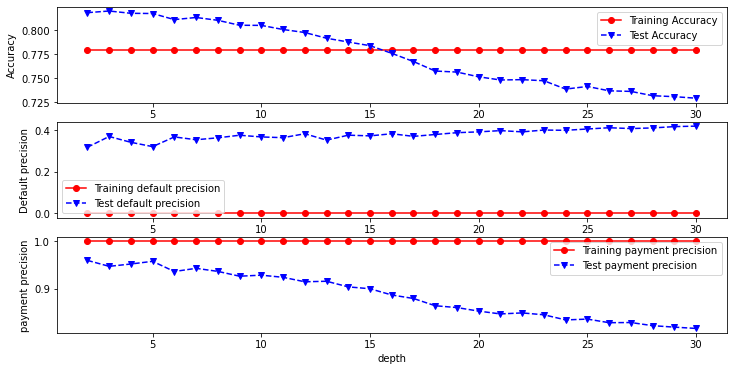

In [17]:
treeBuilder()

Testing overfits immediately when it comes to precision for defaults